# 💻 UnpackAI DL201 Bootcamp - Week 1 - Concepts: Array Indexing

## 📕 Learning Objectives

* Conceptualize the concept of Tensors in the context of machine learning and their benefits.
* Identifiy the differences betwee important data structures such as Python lists, Numpy arrays and Pandas DataFrames.

## 📖 Concepts map
* Common Python data structures (collections)
* Python lists and their essential functionality
* Numpy arrays and their essential functionality
* Pandas DataFrames and their essential functionality
* Pytorch Tensors and their essential functionality

# Introduction

In this notebook, we are going to learn about ***indexing***. Indexing is a central concept, which allows both us and the computer to access datapoints quickly  and easily. Well indexed data is very important in deep learning, because without, it we cannot get started on accessing and manipulating any of our data. 

![Library](DL201/img/week1/library.jpg)

If you can't access each data point, then you can't expect a computer to be able to do it either. Before a ML algorithm can find relationships inside data, it needs to be able to access those data points. Otherwise, it is like looking for a receipt buried under a disheveled stack of papers.   

There are several ways to organize and conceptualize data, but the one covered in this course will be indexing. 

Indexing it is one of the more intuitive, yet powerful ways to access and manipulate data. Pandas, as a data wrangling tool, brings this to the next level.

There is nothing new about this, and everyone knows that indexes are a part of everyday life.

***Indexes are everywhere***

When you read a book, the page number is an index. 
A book, also, has an index called an ISBN, which allows libraries to identify and categorize books.

Postal codes are also indices which allow for the efficient delivery of mails.

Have you  more examples of indices? 

***Definition*** : Indexing can be defined as the act of classifying and providing an index in order to make items easier to retrieve.

# Part 0 : Code preparation

In [68]:
!pip install openpyxl
!git clone https://github.com/unpackAI/DL201.git

##Imports

from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2

## Config Variables |

#Kaggle config

DATA_DIR = Path('/kaggle/working/DL201/data') #uncomment for kaggle
IMAGE_DIR = Path('/kaggle/working/DL201/img') #Uncomment for Kaggle

#Local Config

#DATA_DIR = Path.home()/'Datasets'/'unpackAI'/'DL201'/'data'
#IMAGE_DIR = Path('../img') #uncomment for local machine


# Part 1: Indexing Tabular Data

The pandas library shines in how it is able to index data. The brilliance of pandas is it's ability to assign human readable indicies on top of optimized scientific computing code.

It makes it simple, and straightforward, which is we decided to cover it before getting into computer vision and NLP indexing.

One way it does this is making columns not assigned by numbers, but rather by names. Then, with each column, we can access it through this method. 

As you'll see below, Pandas Columns are essentially a layer of metadata, which is tied to each of the features which makes it very straightforward to access and manipulate the data assigned to them. 

![indextabs](DL201/img/week1/indextabs.jpg)

## 1.1 Example one: Indexing Columns
<hr style="border:1px solid gray"> </hr>

In general, the first thing one does when loading a csv in pandas is to check the following information :

* First, reading the data
* Second, checking its shape
* Third, Looking at the columns 

Reading the data loads it onto the computer's system RAM so that it can be operated on by the CPU.

Checking the shape is a fundamental step that lets us know more about how our data looks like, and how it is going to be indexed.

Then when we look at the columns, it is going to tell us what our features are in the data and how it is going to be useful to us.

Let's take a look at this dataset, which contains data on startups, what market they are in, along with their funding and acquisition status. 

### 1.1.1 Step 1: load the data

In [70]:
startupDataPath = DATA_DIR/'StartUpInvestments'/'investments_VC.csv'
startupData = pd.read_csv(startupDataPath, encoding = 'unicode_escape')

startupData.dropna(inplace=True)

### 1.1.2 Step 2: Check the shape of the data

Whenever you load a data into a dataframe, the first thing you need to do when you load data is to check its shape, composed of a pair of integers. It is good practice to make note of these two numbers because they are going to appear over and over again in your code.

If this number is different than you were expecting, it will tell you right away that your data didn't load properly. ***The first number is the length***, which tells us the number of samples. When you remove samples from your dataset, this number will change, and if it does your code might break. If you remove samples from your dataframe, it is good to do this sooner rather than later.

***The second number is the width***, which is the most important number to pay attention to in pandas. If you get an unexpected number, then it means that your data has not loaded correctly. If you remove or add a feature, this number is going to change.

It also needs to be paid attention to because this number will follow you around for the rest of the project. It will help you know what is going in. 

In [71]:
startupData.shape
# What does this mean?

(21840, 39)

### 1.1.3 Step 3: inspect the first few rows/samples/instances

The next thing that is very useful to do is to take a peek at your data. Take a look at it, do you see numbers? Text? Categories? Time data? 

Often, people use .head() as a way to do this, but sample is a good method to use because it might show you something you weren't expecting. 

In [72]:
startupData.sample(5)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
33765,/organization/proofpilot,ProofPilot,http://www.proofpilot.com/,|Health Care|Market Research|Health and Wellne...,Clinical Trials,"16,52,000",operating,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3633,/organization/atossa-genetics,Atossa Genetics,http://www.atossagenetics.com,|Biotechnology|,Biotechnology,"76,00,000",operating,USA,WA,Seattle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24354,/organization/liveleaf,LiveLeaf,http://liveleaf.com,|Biotechnology|,Biotechnology,"38,50,000",operating,USA,CA,SF Bay Area,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33392,/organization/presto-services,Presto Services,http://www.presto.com,|Messaging|,Messaging,"1,00,00,000",operating,USA,CA,SF Bay Area,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40245,/organization/spotme,SpotMe,http://spotmefit.com,|Health and Insurance|Fitness|Health and Welln...,Health and Wellness,"20,000",operating,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The columns in this dataframe are our features

Which columns are you interested in? What do you want to know more about? 

The .columns method allows us to get the names of columns in our dataframe 

This is a good step because sometimes the column names are messy and might not be as they originally appear. 
Oftentimes, you may need to  rename columns. However, this dataset is rather clean, so we can wait until the skills book to cover how to do this


For example the column for 'market' has a typo. Can you find it? Are there any others? 

In [73]:
print(startupData.columns)

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')


We can't change just one element of the columns, so instead, we can convert it to a list, change what needs to be changed, and then replace it.

In this example, removing the whitespace is done with the vectorized .str.strip() method rather than iterating through a loop. 

In [74]:
columnSeries = pd.Series(startupData.columns)
columnSeries = columnSeries.str.strip()
startupData.columns = columnSeries

We can access columns in our dataframe by passing the name inside of square brackets

startupData['name']

If the name doesn't have spaces, we can also access it with a period 

startupData.name

In [75]:
startupData['name'] #startupData.name

0                       #waywire
8               004 Technologies
12                 1-800-DENTIST
13                 1-800-DOCTORS
16                   10-20 Media
                  ...           
49425    Zynerba Pharmaceuticals
49426                      Zynga
49427                   Zyngenia
49429                     ZYOMYX
49437                      [x+1]
Name: name, Length: 21840, dtype: object

We can also call multiple columns passing a list of column names



In [76]:
startupData[['name','city']].head()

,name,city
0,#waywire,New York
8,004 Technologies,Champaign
12,1-800-DENTIST,Los Angeles
13,1-800-DOCTORS,Iselin
16,10-20 Media,Woodbine


## Example two: Indexing Rows 
<hr style="border:1px solid gray"> </hr>

![TensorIndex](/kaggle/working/DL201/img/week1/1_3DTensor.jpg)
Source: https://www.surajx.in/

Congratulation, we now know how to index columns of tabular data. 


#### Indexing a single row

Now, let's try to get rows. In AI fields, rows are reffered to as samples or instances. 

This can be done with the .loc and .iloc methods

If we want to access exactly one sample, we can input it's index into the .iloc method 

In [77]:
startupData.iloc[4096]

permalink                                   /organization/coachlogix
name                                                      CoachLogix
homepage_url                               http://www.coachlogix.com
category_list           |Human Resources|Career Management|Software|
market                                              Human Resources 
funding_total_usd                                         10,00,000 
status                                                     operating
country_code                                                     USA
state_code                                                        CA
region                                                     San Diego
city                                                       San Diego
funding_rounds                                                   1.0
founded_at                                                2013-10-01
founded_month                                                2013-10
founded_quarter                   

#### Indexing Multiple rows

Since data in Vector, Series, or Matrix form consists of more than one value organized together, we will need to be able to access multiple rows.

We can do that by telling the code to select a range of numbers. 

The first number before the colon (:) is the lower bound
The second number is the upper bound.

In [78]:
startupData.iloc[0:5]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,/organization/1-800-dentist,1-800-DENTIST,http://www.1800dentist.com,|Health and Wellness|,Health and Wellness,-,operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,/organization/1-800-doctors,1-800-DOCTORS,http://1800doctors.com,|Health and Wellness|,Health and Wellness,"17,50,000",operating,USA,NJ,Newark,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,/organization/10-20-media,10-20 Media,http://www.10-20media.com,|E-Commerce|,E-Commerce,"20,50,000",operating,USA,MD,Baltimore,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Warm reminder that python starts counting with the number 0 instead of 1. This custom goes back to the early days of computing when memory was a huge constraint. 1-9 is just 9 numbers in a set, while 0-9 has ten numbers in the set. Leaving the 0 meant wasting allocated space. Now this is not a concern, but the custom has remained.

In [79]:
# Why is the shape of this data special and what does it tell us about the colon operator?

startupData.iloc[:].shape # 

(21840, 39)

Giving negative numbers will tell pandas to give you the last rows in the dataframe. In this case, it is a good idea to check the back as well because these rows are completely empty. These will have to be dropped later

In [80]:
startupData.iloc[-5:]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
49425,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,|Pharmaceuticals|,Pharmaceuticals,"1,30,00,000",operating,USA,PA,Philadelphia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49426,/organization/zynga,Zynga,http://www.zynga.com,|Technology|Facebook Applications|Networking|G...,Technology,"86,65,50,786",operating,USA,CA,SF Bay Area,...,0.0,0.0,15026000.0,355187000.0,490000000.0,0.0,0.0,0.0,0.0,0.0
49427,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,"2,50,00,000",operating,USA,MD,"Washington, D.C.",...,0.0,0.0,25000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49429,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,|Biotechnology|,Biotechnology,"3,42,75,015",operating,USA,MO,MO - Other,...,0.0,0.0,0.0,12000000.0,0.0,0.0,0.0,0.0,0.0,0.0
49437,/organization/x,[x+1],http://www.xplusone.com/,|Enterprise Software|,Enterprise Software,"4,50,00,000",operating,USA,NY,New York City,...,0.0,0.0,16000000.0,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Accessing data by row and column

If you can access data by column, and you can access it by row, you can do both at the same time

In the example below, we can extract the name and region column, then index rows out of this column

In [81]:
startupData[['name','region']].iloc[0:10]

,name,region
0,#waywire,New York City
8,004 Technologies,"Springfield, Illinois"
12,1-800-DENTIST,Los Angeles
13,1-800-DOCTORS,Newark
16,10-20 Media,Baltimore
17,1000 Corks,"Portland, Oregon"
20,1000memories,SF Bay Area
21,1000museums.com,Seattle
26,100health,Madison
27,100Plus,SF Bay Area


Now, that we can access data by the index, we are on the first step 

## Example 3: Querying/Searching rows in Pandas
<hr style="border:1px solid gray"> </hr>

![Database](DL201/img/week1/dataserver.jpg)

Very rarely will we use pandas to query specific rows by their index location. But now that we understand this principle we can go further into the notebook.

Rather, what we can do is give pandas a command which asks it to return samples which meet a condition.

This is powerful because it allows us to cut through huge amounts of data.


In this, we are going to find instances of our dataframe which meet the conditions we can give it.

Here is an example, where we can get all the instances of the dataframe where the startup's region is 'Los Angeles'

In [82]:
startupData[startupData['region'] == 'Los Angeles']

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
12,/organization/1-800-dentist,1-800-DENTIST,http://www.1800dentist.com,|Health and Wellness|,Health and Wellness,-,operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,/organization/12society,12Society,http://www.12Society.com,|E-Commerce|,E-Commerce,-,acquired,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,/organization/140fire,140Fire,http://140fire.com,|Entertainment|Sports|Real Time|Social Media|V...,Entertainment,"5,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,/organization/2adpro-media-solutions,2AdPro Media Solutions,http://www.2adpro.com,|Outsourcing|Advertising|,Outsourcing,-,operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,/organization/8th-story,8th Story,http://www.8thstory.com,|Lifestyle|Retail|E-Commerce|Fashion|,Fashion,-,operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49271,/organization/zomazz,Zomazz,http://www.zomazz.com,|Curated Web|,Curated Web,"20,40,342",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49315,/organization/zoondy,Zoondy,http://zoondy.com,|Curated Web|,Curated Web,"75,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49343,/organization/zqgame,ZQGame,http://zqgame.com,|Games|,Games,"42,20,018",operating,USA,CA,Los Angeles,...,0.0,0.0,4220018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49367,/organization/zuma-ventures,Zuma Ventures,http://www.zuma.ventures,|Product Development Services|Marketplaces|Tec...,Technology,"1,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


It is crucial to understand what this line of code is doing. To do so, let's go back to the indexing example and run the code that goes inside of the first bracket



In [83]:
exampleSeries = startupData['region'] == 'Los Angeles'
exampleSerie

0        False
8        False
12        True
13       False
16       False
         ...  
49425    False
49426    False
49427    False
49429    False
49437    False
Name: region, Length: 21840, dtype: bool

What this does is give us an index which tells pandas which instances that we want. 

As you can see, they both are the same length, and therefore are compatible.



In [93]:
exampleSeries.shape[0] == startupData.shape[0]

True

This approach can also be used for more complex queries. For example, we could select a 

In [94]:
query = ((startupData['country_code'] == 'USA') & 
         (startupData['market'] == 'Technology')
         )
print(query.shape)

(21840,)


In [86]:
startupData[query]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H


Now, this presents a problem, in that it shows that there is noise in our data. Let's use the .iloc method to inspect it manually


In [87]:
startupData.iloc[1].values

array(['/organization/004-technologies', '004 Technologies',
       'http://004gmbh.de/en/004-interact', '|Software|', ' Software ',
       ' -   ', 'operating', 'USA', 'IL', 'Springfield, Illinois',
       'Champaign', 1.0, '2010-01-01', '2010-01', '2010-Q1', 2010.0,
       '2014-07-24', '2014-07-24', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
      dtype=object)



 Just like in the columns, the way that the data was collected means that it probably has white spaces around it. This is not a problem because we apply the indexing concept to remove them.





In [88]:
text_columns = startupData.select_dtypes(['object']) 
print('shape of first query', text_columns.shape)
text_column_names = text_columns.columns 
print('number of text columns',text_column_names.shape)



shape of first query (21840, 16)
number of text columns (16,)


This selects the text columns for us, and then allows us to apply it to the dataframe to remove the extra white spaces with just a few lines of code. 

In [89]:
startupData[text_column_names] = text_columns.apply(lambda x: x.str.strip())

Now that the whitespace is removed, let's retry the query again

In [90]:
query = ((startupData['country_code'] == 'USA') & 
         (startupData['market'] == 'Technology')
         )
print(startupData[query].shape)
startupData[query].sample(5)


(123, 39)


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
24493,/organization/localrealtors-com,LocalRealtors.com,http://localrealtors.com,|Real Estate|Realtors|Technology|,Technology,"3,00,000",operating,USA,CA,San Diego,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17955,/organization/greenway-health,Greenway Health,http://www.greenwayhealth.com,|Technology|Business Services|Software|,Technology,"2,20,00,000",operating,USA,GA,Atlanta,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14386,/organization/exajoule,Exajoule,http://www.exajoule.com,|Clean Energy|Technology|Energy|Hardware + Sof...,Technology,"25,00,000",operating,USA,CA,SF Bay Area,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2274,/organization/ameriworks,AmeriWorks,http://www.pos-university.com,|Technology|,Technology,-,operating,USA,PA,Scranton,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19651,/organization/i-stand,I-Stand,http://www.talkeasier.com,|Technology|,Technology,-,operating,USA,FL,Palm Beaches,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, the data shows up. Remember, if your data behaves unexpected, it is usually a problem with how it is inputted, and .iloc can be very useful to peer down at a low level to see what is actually occuring

## Part 2 : Indexing in Computer Vision
<hr style="border:2px solid gray"> </hr>

### CV Indexing: example 1 (Resizing and Cropping an Image)
<hr style="border:1px solid gray"> </hr>

Indexing is relatively straightforward with images. Every pixel on your screen has an x and a y cordinate.  Likewise, images have this as well. Knowing what the dimensions of our image are, allow us to resize and crop them. This is usually done programmatically, however, this is a good opportunity to play with the raw numbers to get a better understanding of it. 

In [91]:
# Option to upload
#colab.upload()

sampleImagePath = IMAGE_DIR/'week1'/'highway.jpg'

In [ ]:
img = cv2.imread(str(sampleImagePath))

When we open up the image in opencv, it converts this into a numpy array. The interesting thing about this is that now we have a standard data type that can be used across many different tools in the python libraries. This become useful because a lot of the transforms and filters that are done are mathematical operations that occur across disciplines. It is a misconception that images are very different than tables of data. Once you drill down to the level of the computer many similarities begin to appear. 

In [ ]:
type(img)

numpy.ndarray

The same rule of shape also applies. Again, this needs to be paid attention to. The difference now is that those numbers have different meanings than before. Now, rather than rows and columns, the x and y describe the length and width of the image.

The z dimension here describes the three different color channels (Red Green and Blue). 

In [ ]:
img.shape

(640, 960, 3)

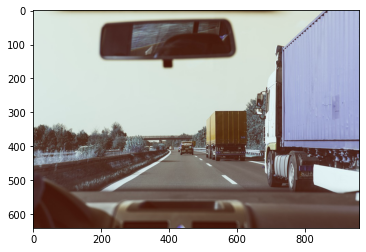

In [ ]:

plt.imshow(img)
plt.show()

In [ ]:
#cv2.destroyAllWindows() #close the image window

In [ ]:
img = cv2.resize(img,(0,0),fx=0.5,fy=0.5) # resizes the image by percentage
print(img.shape)

(320, 480, 3)


### CV Indexing Example 2: Labeling Images with openCV
<hr style="border:1px solid gray"> </hr>

The concept of indexing can be applied to image segmentation. If our image metadata contains information about where objects are in the image, it can often be encoded as two corners of a rectangular box. 

#### Creating a boxed label

In this section, we're going to add a rectangle to our images that outline where someting is located in the image.

Most often this is done by the AI model, but let's take a look at how it can be done under the hood

In [ ]:
x1 = 250
y1 = 150
corner1 = (x1,y1)


x2 = 320
y2 = 220
corner2 = (x2,y2)


color = (255,0,0) #red  #RGB Red Green Blue  
frameWidth = 3 #pixels

labeled_img = cv2.rectangle(img,corner1,corner2,color,frameWidth)

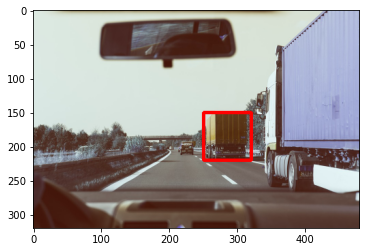

In [ ]:
#cv2.imshow('Highway',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows() #close the image window

plt.imshow(labeled_img)
plt.show()

Now, this image has a box around the truck ahead of it. Most of these segmentation processes are automated, but you may see sets of indicies that show you where certain features are contained within an image. Indexing makes this a fast and efficient process.

# Part 3 : Discussions - Questions

## Summary :

Indexing as a tool is fundamental to Big Data and Deep Learning but is often misunderstood. Since people are used to thinking of programming in terms of loops, it is forgotten how there are other ways to accomplish handling big data. Indexing is not only more efficient because it can skip instances that don't meet certain criteria, but also faster because it opens the door for operations to be completed in parallel.

##  Multiple Answers Questions


1. What should you do if you call a column or query the dataframe, and it doesn't load as you would expect what should you do.

    A. Inspect the syntax of your code

    B. Inspect a row that you expected to load, and check to see if there are any typos or formatting errors in the data

    C. Check the shape of the output series or dataframe and see if it's what you expect. 

    D. Copy and paste the entire error message, including the stack traces without reading it to find the most relevant information that a search engine would pick up.

2. How do you access the rows and columns of a dataframe as if it were a matrix?

    A. Using .iloc or .loc methods

    B. using the .values method

    C. By transforming the columns from a tuple into a list 

    D. Loading it directly onto a hyper optimized gpu for automatic preprocessing.


3. What does ~ do to a pandas dataframe?

    A. or

    B. Not equal to

    C. Approximately equal to

    D. reset index

4. Which of the following are reasons why people use Pandas

    A. It is an all-purpose tool that can handle over a dozen datatypes to convert them into quantifiable tensors efficiently by leveraging optimized legacy C and Fortran code. 

    B. It can't handle or accept messy data that contains duplicate indices, typos, multiple language encodings 

    C. It can easily scale to handle multi-threaded, batched workflows consisting of terabytes of data across multiple cloud GPU accelerated instances. 

    D. It contains elements of many existing programs such as SAS, SQL, Excel, and R which people are familiar with and be able to pick up and get familiar with pandas quickly

## Exercises
<hr style="border:2px solid gray"> </hr>

### Explore the usage of known and conditional indexes in Numpy arrays.

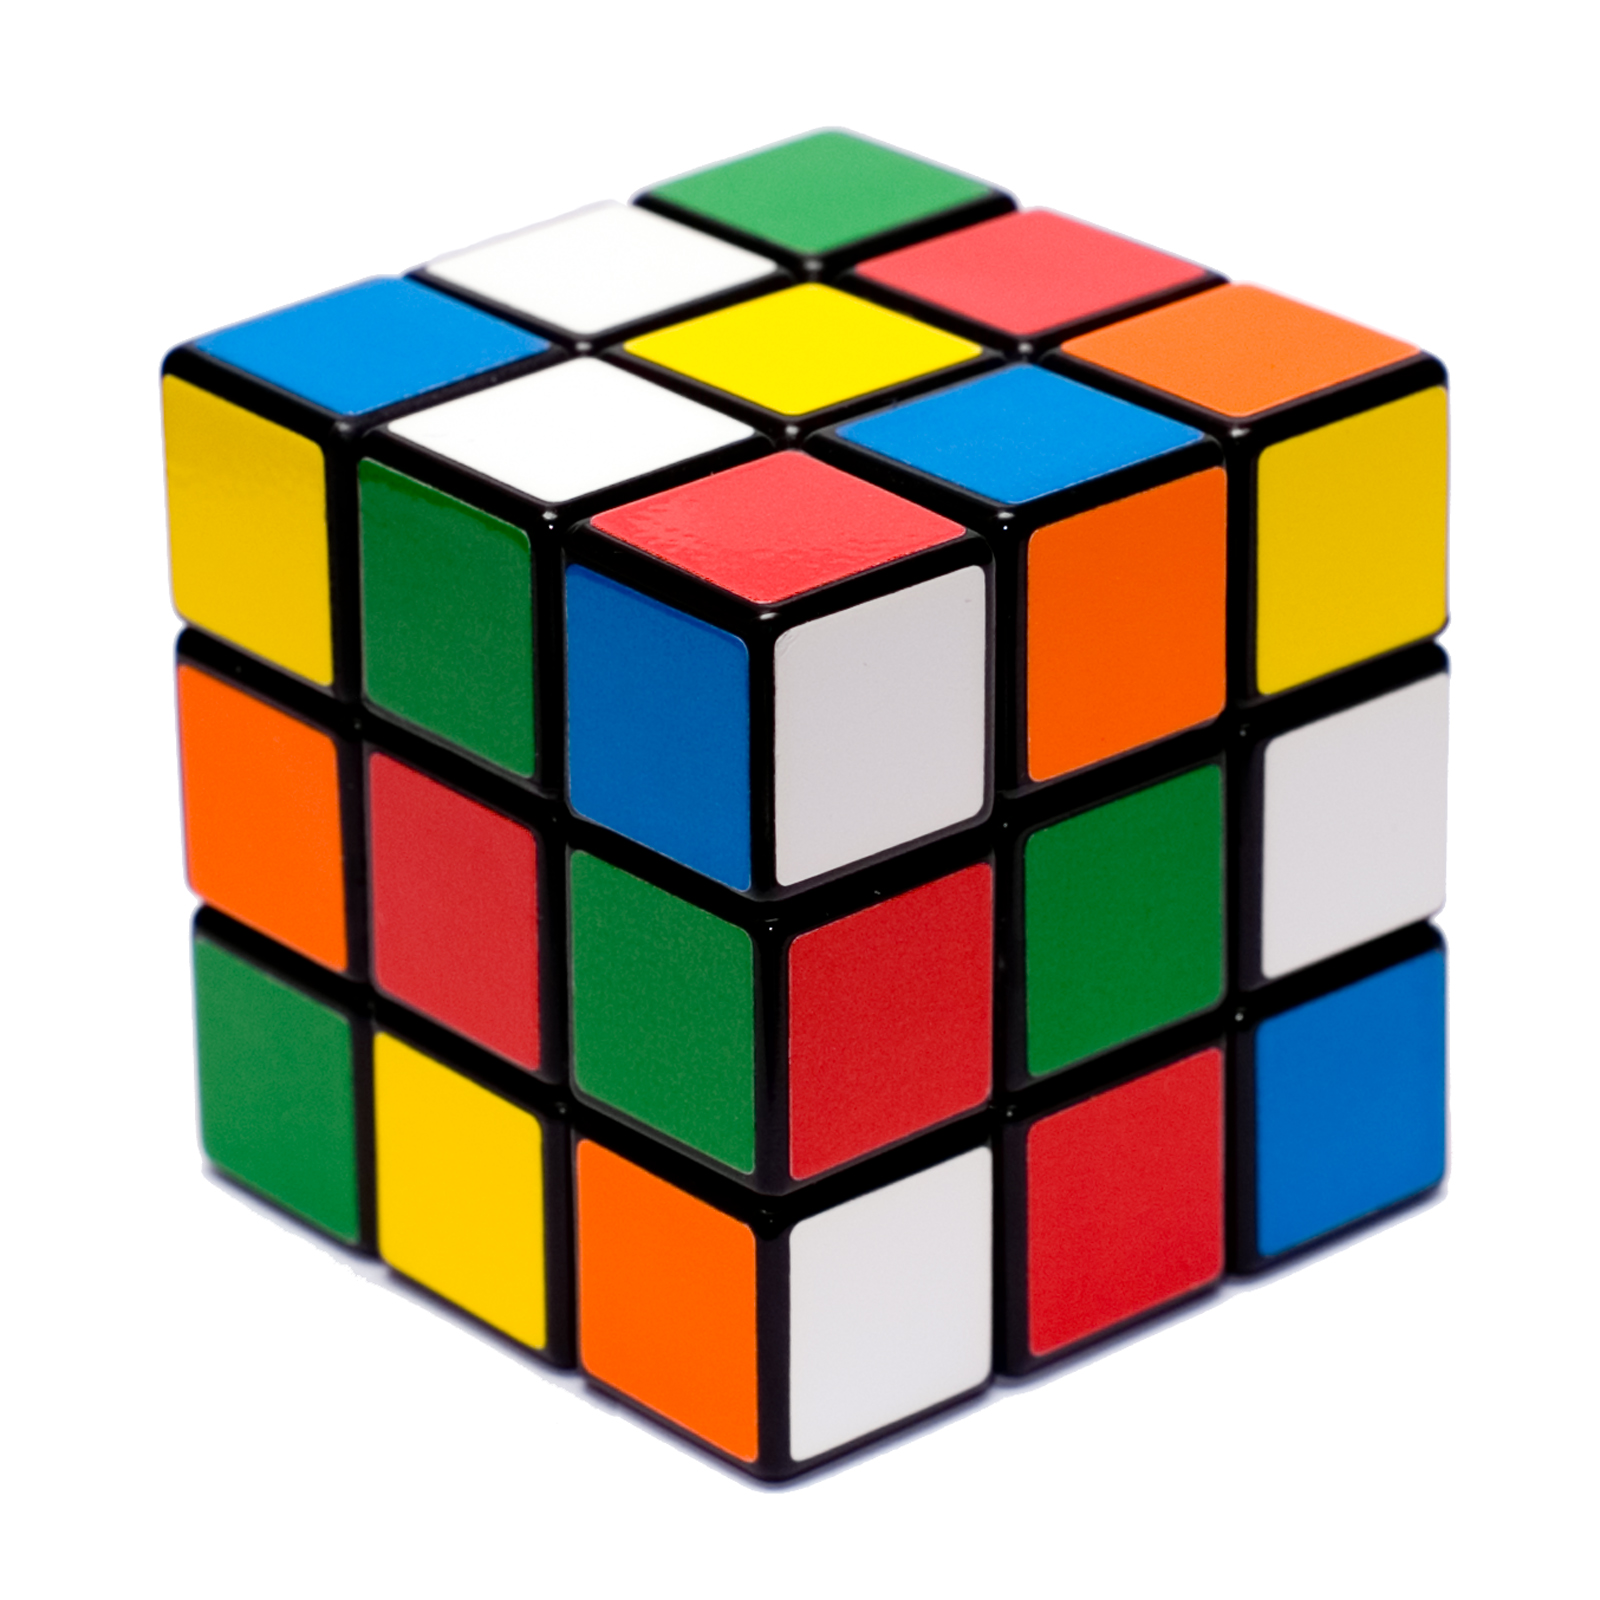

In [96]:
# Step 1: Load a sample image
import numpy
from PIL import Image
from IPython.display import display

image_object = Image.open(IMAGE_DIR/"week1/Rubiks_cube.jpg")  # Notice this time we include the path to the image
display(image_object)

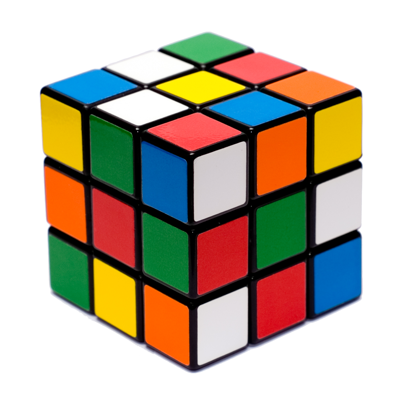

Image shape: (400, 400, 3)


In [ ]:
# Step 2: Load a 25% resized version of the image into a numpy array

# Resize the image 
image_object = image_object.resize((int(image_object.width/4), int(image_object.height/4)))
display(image_object)

image_data = numpy.array(image_object)
image_width, image_height = image_data.shape[:2]
print('Image shape:', image_data.shape)

The code cells below allow to practice indexing and slicing in NumPy arrays.

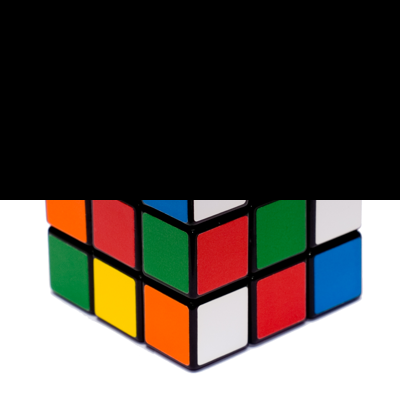

In [ ]:
# Step 3: Define a few examples of scalar-based ranges for indexing

# Make the top of the image black
image_1 = image_data.copy()
image_1[:image_height//2, :, :] = 0
display(Image.fromarray(image_1))   # Display the image, notice the conversion to PIL image

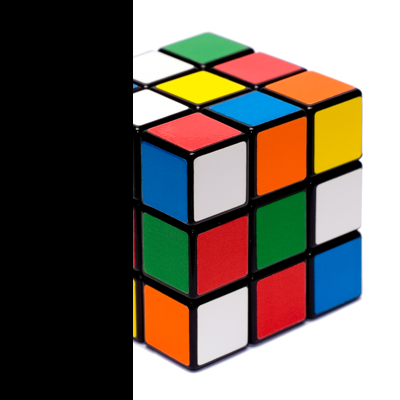

In [ ]:
# Make one third of the image height black
image_2 = image_data.copy()
image_2[:, :image_height//3, :] = 0
display(Image.fromarray(image_2))

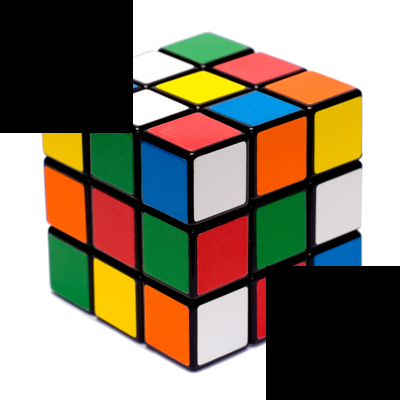

In [ ]:
# Define an artificial grid of 3x3 based on the image size
image_3 = image_data.copy()
grid_rows = 3
grid_columns = 3
cell_width = int(image_width / grid_columns)
cell_height = int(image_height / grid_rows)
grid_positions = [[] for _ in range(grid_rows * grid_columns)]

# Make the first and the last cells black
cell_1 = image_3[:cell_width, :cell_height, :]
cell_1[:] = 0                                       # Notice this array-wise selection

cell_9 = image_3[cell_width * 2:, cell_height * 2:, :]
cell_9[:] = 0
display(Image.fromarray(image_3))

for the last 3x3 grid example above, try to define the other 7 remaining cells or better yet, define a function that creates a MxN grid and generate the array positions for any of the cells.

horizontal bars indexes: [  0  44  88 133 177 222 266 311 355 400]


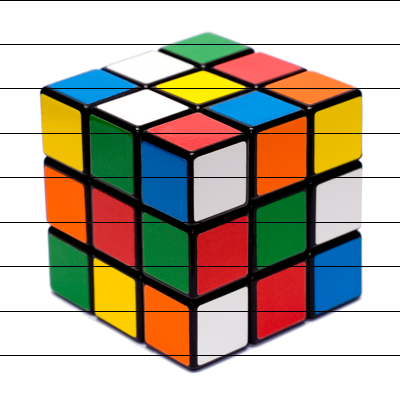

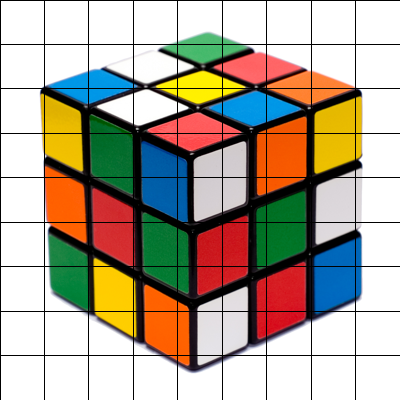

In [ ]:
# Step 4: Define a few examples of array-based indexing

# Introduce horizontal and vertical black bars on the image
image_4 = image_data.copy()
number_bars = 10

horizonta_bars = numpy.linspace(0, image_height, number_bars)       
horizonta_bars = horizonta_bars.astype(int)
print(f'horizontal bars indexes: {horizonta_bars}')
image_4[horizonta_bars[:-1], :, :] = 0
display(Image.fromarray(image_4))

vertical_bars = numpy.linspace(0, image_width, number_bars)         
vertical_bars = vertical_bars.astype(int)
image_4[:, vertical_bars[:-1], :] = 0
display(Image.fromarray(image_4))

For the example above, how would you control the thickness (in array elements or pixels) of the bar?

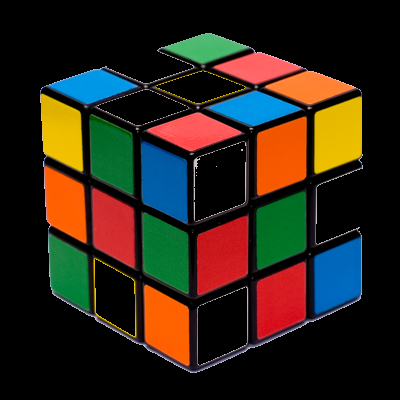

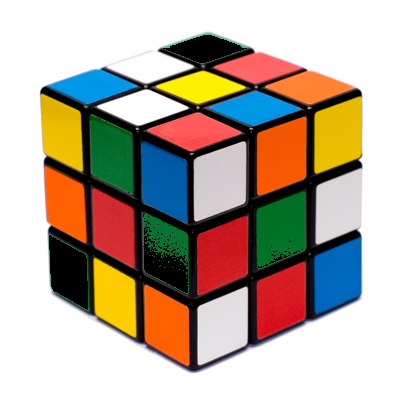

In [ ]:
# Step 5: Define a few examples for condition-based indexing (for unknown indexes)

# Find the array indexes of pixels with high values for the green
image_5 = image_data.copy()
value_threshold = 200

image_5[numpy.where(image_data[:, :, 1] >= value_threshold)] = 0
display(Image.fromarray(image_5))

# Modify the condition so it does not affects the background
image_6 = image_data.copy()
value_threshold = 120
image_6[numpy.where((image_data[:, :, 1] >= value_threshold) & (image_data[:, :, 0] < value_threshold) & (image_data[:, :, 2] < value_threshold) )] = 0
display(Image.fromarray(image_6))
